# Question 9


Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing). Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new random forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next, evaluate the classifier on the test set. How does it compare to the previous classifier? Try again with an SGDClassifier. How much does PCA help now?


## Links

* https://colab.research.google.com/github/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynb#scrollTo=GupeM4uzXLnB

## Imports

In [ ]:
from keras.datasets import mnist
from matplotlib import pyplot as plt   
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

## Load the MNIST dataset (introduced in Chapter 3) and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [ ]:
print("Shape of the training instances: ", X_train.shape) # 60000 images,28x28 pixel
print("Shape of the training labels: ", y_train.shape)
print("Shape of the test instances: ", X_test.shape) # 10000 images
print("Shape of the test labels: ", y_test.shape)

Shape of the training instances:  (60000, 28, 28)
Shape of the training labels:  (60000,)
Shape of the test instances:  (10000, 28, 28)
Shape of the test labels:  (10000,)


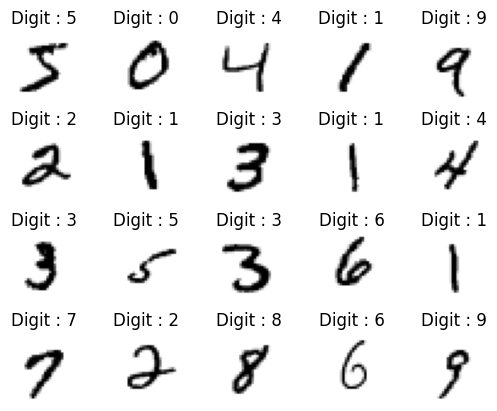

In [ ]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(X_train[i],cmap='gray_r')
  plt.title("Digit : {}".format(y_train[i]))
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')

## Train a random forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. 

In [ ]:
# Preprocessing
# Flatten the training data (60000,28,28) --> (5000,784)
X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

In [ ]:
print("After reshaping and flattening")
print("Shape of the training instances: ", X_train.shape) # 60000 images,28x28 pixel
print("Shape of the test instances: ", X_test.shape) # 10000 images

After reshaping and flattening
Shape of the training instances:  (60000, 784)
Shape of the test instances:  (10000, 784)


In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42) # 500 ağaç

In [ ]:
%time rnd_clf.fit(X_train, y_train)
# Wall clock time measures how much time has passed, as if you were looking at 
# the clock on your wall. CPU time is how many seconds the CPU was busy.1 Ağu 2019

CPU times: user 3min 13s, sys: 807 ms, total: 3min 14s
Wall time: 3min 15s


RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
# Make predictions for the test set
y_pred_rnd = rnd_clf.predict(X_test)

# accuracy for the test data
accuracy_score(y_test, y_pred_rnd)

0.9713

##  Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%.

In [ ]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [ ]:
X_train_reduced.shape # 784 featuredan 154 e inmiş

(60000, 154)

## Train a new random forest classifier on the reduced dataset and see how long it takes. 

In [ ]:
rnd_clf_with_pca = RandomForestClassifier(n_estimators=500, random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 8min 43s, sys: 967 ms, total: 8min 44s
Wall time: 8min 58s


RandomForestClassifier(n_estimators=500, random_state=42)

* Training is actually about twice slower now. Dimensionality reduction does not always lead to faster training time: it depends on the dataset, the model and the training algorithm.

## Next, evaluate the classifier on the test set. 

In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9536

* It is common for performance to drop slightly when reducing dimensionality, because we do lose some potentially useful signal in the process. However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training *and* reduced performance.

## Try again with an SGDClassifier.

In [ ]:
# Train a SGDclassifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. 
sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: user 2min 14s, sys: 244 ms, total: 2min 15s
Wall time: 2min 14s


SGDClassifier(random_state=42)

In [ ]:
# evaluate on test set
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.874

In [ ]:
# Train a new SGDclassifier on the reduced dataset and see how long it takes. 
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

CPU times: user 30.6 s, sys: 73 ms, total: 30.7 s
Wall time: 30.6 s


SGDClassifier(random_state=42)

In [ ]:
# Next, evaluate the classifier on the test set.
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.8959

                                         
* Random Forest without PCA : 3min 15s - 0.9713
* Random Forest with PCA : 8min 58s - 0.9536
* SGD without PCA : 2min 14s - 0.874
* SGD with PCA : 30.6s - 0.8959